In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

# Calcualte the area
## Calculate the sum area of the clusters

In [2]:
dest_area = pd.DataFrame()
start_area = pd.DataFrame()
i=0
k=0
for file in os.listdir(r'..\data\total_cluster_boundary_area'):
    if 'dest' in file:
        dest_area.loc[i,'OD']= 'dest'
        dest_area.loc[i,'Month'] = int(float(file.split('_')[2]))
        dest_area.loc[i,'Area'] = pd.read_excel(r'..\data\total_cluster_boundary_area\%s'%file).loc[0,'AREA']
        i=i+1
k=0
for file in os.listdir(r'..\data\total_cluster_boundary_area'):
    if 'starting' in file:
        start_area.loc[k,'OD']= 'starting'
        start_area.loc[k,'Month'] = int(float(file.split('_')[2]))
        start_area.loc[k,'Area'] = pd.read_excel(r'..\data\total_cluster_boundary_area\%s'%file).loc[0,'AREA']
        k=k+1    

## Calculate the coverage of all the clusters

In [3]:
total_dest_area = pd.DataFrame()
total_start_area = pd.DataFrame()
i=0
k=0
for file in os.listdir(r'..\data\overall_boundary_area'):
    if 'dest' in file:
        print(int(float(file[:-4].split('_')[1])))
        total_dest_area.loc[i,'OD']= 'dest'
        total_dest_area.loc[i,'Month'] = int(float(file[:-4].split('_')[1]))
        total_dest_area.loc[i,'Area'] = pd.read_excel(r'..\data\overall_boundary_area\%s'%file).loc[0,'area']
        i=i+1
k=0
for file in os.listdir(r'..\data\overall_boundary_area'):
    if 'starting' in file:
        total_start_area.loc[k,'OD']= 'starting'
        total_start_area.loc[k,'Month'] = int(float(file[:-4].split('_')[1]))
        total_start_area.loc[k,'Area'] = pd.read_excel(r'..\data\overall_boundary_area\%s'%file).loc[0,'area']
        k=k+1

1
10
2
3
4
5
6
7
8
9


In [4]:
boundary_area = pd.concat([start_area,dest_area]).sort_values(by = 'Month')
total_boundary_area = pd.concat([total_start_area,total_dest_area]).sort_values(by = 'Month')
total_boundary_area

,OD,Month,Area
0,starting,1,1363.800049
0,dest,1,1230.040039
2,starting,2,1662.310059
2,dest,2,1068.979980
3,starting,3,2909.659912
3,dest,3,1372.500000
4,starting,4,2297.290039
4,dest,4,2443.750000
5,starting,5,2391.260010
5,dest,5,2147.219971


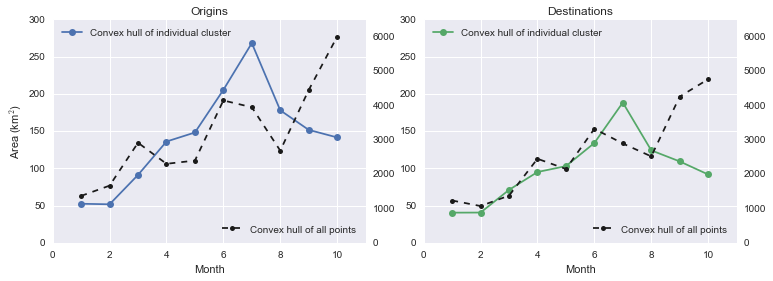

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize = (10,3.5))
plt.tight_layout(pad=0.4, w_pad=3, h_pad=5)

# plot the origins
boundary_area[boundary_area['OD']=='starting'].plot(x='Month',y='Area',style ='b-o',ax = axes[0])
total_boundary_area[total_boundary_area['OD'] == 'starting'].plot(x='Month',secondary_y='Area',style ='k--o',markersize =5,ax = axes[0])
axes[0].set_ylabel('Area (km$^2$)')
axes[0].set_title('Origins')
axes[0].set_ylim(0,300)
axes[0].set_xlim(0,11)
axes[0].right_ax.set_ylim(0,6500)
axes[0].grid(True)
axes[0].right_ax.grid(False)
# legend control
axes[0].legend(['Convex hull of individual cluster'],loc= 2)
axes[0].right_ax.legend(['Convex hull of all points'],loc = 4)

# plot the destinations
boundary_area[boundary_area['OD']=='dest'].plot(x='Month',y='Area',style='g-o',ax = axes[1])
total_boundary_area[total_boundary_area['OD'] == 'dest'].plot(x='Month',secondary_y='Area',style ='k--o',markersize = 5,ax = axes[1],zorder =ax2.get_zorder()-1)
axes[1].set_title('Destinations')
axes[1].set_xlim(0,11)
axes[1].set_ylim(0,300)
axes[1].right_ax.set_ylim(0,6500)
# legend control
axes[1].legend(['Convex hull of individual cluster'],loc= 2)
axes[1].right_ax.legend(['Convex hull of all points'],loc = 4)
axes[1].grid(True)
axes[1].right_ax.grid(False)
fig.savefig(r'../plots/spatial_coverage_of_clusters',dpi=300,bbox_inches='tight')